In [ ]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/audit.csv

--2022-03-22 11:20:40--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/audit.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.149.138
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.149.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39965 (39K) [text/csv]
Saving to: ‘audit.csv’

audit.csv           100%[===================>]  39.03K  --.-KB/s    in 0.1s    

2022-03-22 11:20:40 (292 KB/s) - ‘audit.csv’ saved [39965/39965]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
## step 0: caricare il dataset e definizione tipo di problema (classification / regression; chi è il target?)

df = pd.read_csv('audit.csv')
df
#classificazione binaria 0 = no rischio / 1 = rischio (target ultima colonna)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,2,0.40,2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,2,0.37,2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,2,0.04,2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,2,0.00,2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [ ]:
## step 1: exploratory data analisys

df.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sector_score,776.0,20.184536,24.319017,1.85,2.3700,3.890,55.5700,59.85
PARA_A,776.0,2.450194,5.678870,0.00,0.2100,0.875,2.4800,85.00
SCORE_A,776.0,3.512887,1.740549,2.00,2.0000,2.000,6.0000,6.00
PARA_B,776.0,10.799988,50.083624,0.00,0.0000,0.405,4.1600,1264.63
SCORE_B,776.0,3.131443,1.698042,2.00,2.0000,2.000,4.0000,6.00
TOTAL,776.0,13.218481,51.312829,0.00,0.5375,1.370,7.7075,1268.91
numbers,776.0,5.067655,0.264449,5.00,5.0000,5.000,5.0000,9.00
Marks,776.0,2.237113,0.803517,2.00,2.0000,2.000,2.0000,6.00
Money_Value,775.0,14.137631,66.606519,0.00,0.0000,0.090,5.5950,935.03
MONEY_Marks,776.0,2.909794,1.597452,2.00,2.0000,2.000,4.0000,6.00


In [ ]:
df.info()
#in LOCATION_ID c'è almeno un valore non numerico

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [ ]:
#df['LOCATION_ID'] = df['LOCATION_ID'].astype(float)
#print(dtypes)
#si vede che c'è errore di digitazione non corrreggibile camibando tipo, ma è un campo non a valore aggiunto,
#si applica il terorema di sticazzi

ValueError: ignored

In [ ]:
# controllo valori nulli
#df.isnull().sum().sum()==0
df.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [ ]:
#visualizzo quanti valori per tipo per capire il bilanciamento del dataset, in questo caso 2/3 - 1/3 circa 
#ordine di grandezza problematico solo x problemi molto complessi; il problema x noi c'è per sbilanciamenti molto più pesanti
#rischio che il modello non impari bene a classificare; esistono techinche di oversampling ma x ora mi dovrei fermare
df['Risk'].value_counts()

1    486
0    290
Name: Risk, dtype: int64

In [ ]:
df.mean()

Sector_score     20.184536
PARA_A            2.450194
SCORE_A           3.512887
PARA_B           10.799988
SCORE_B           3.131443
TOTAL            13.218481
numbers           5.067655
Marks             2.237113
Money_Value      14.137631
MONEY_Marks       2.909794
District          2.505155
Loss              0.029639
LOSS_SCORE        2.061856
History           0.104381
History_score     2.167526
Score             2.702577
Risk              0.626289
dtype: float64

del df['LOCATION_ID']

In [ ]:
df = df.dropna()

In [ ]:
del df['LOCATION_ID']

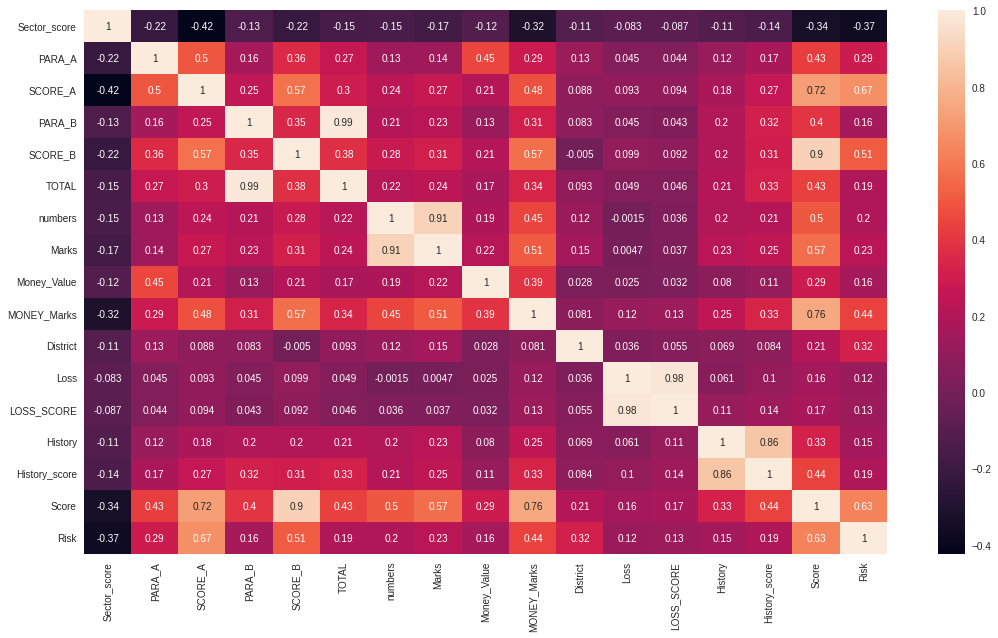

In [ ]:
import seaborn as sns

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

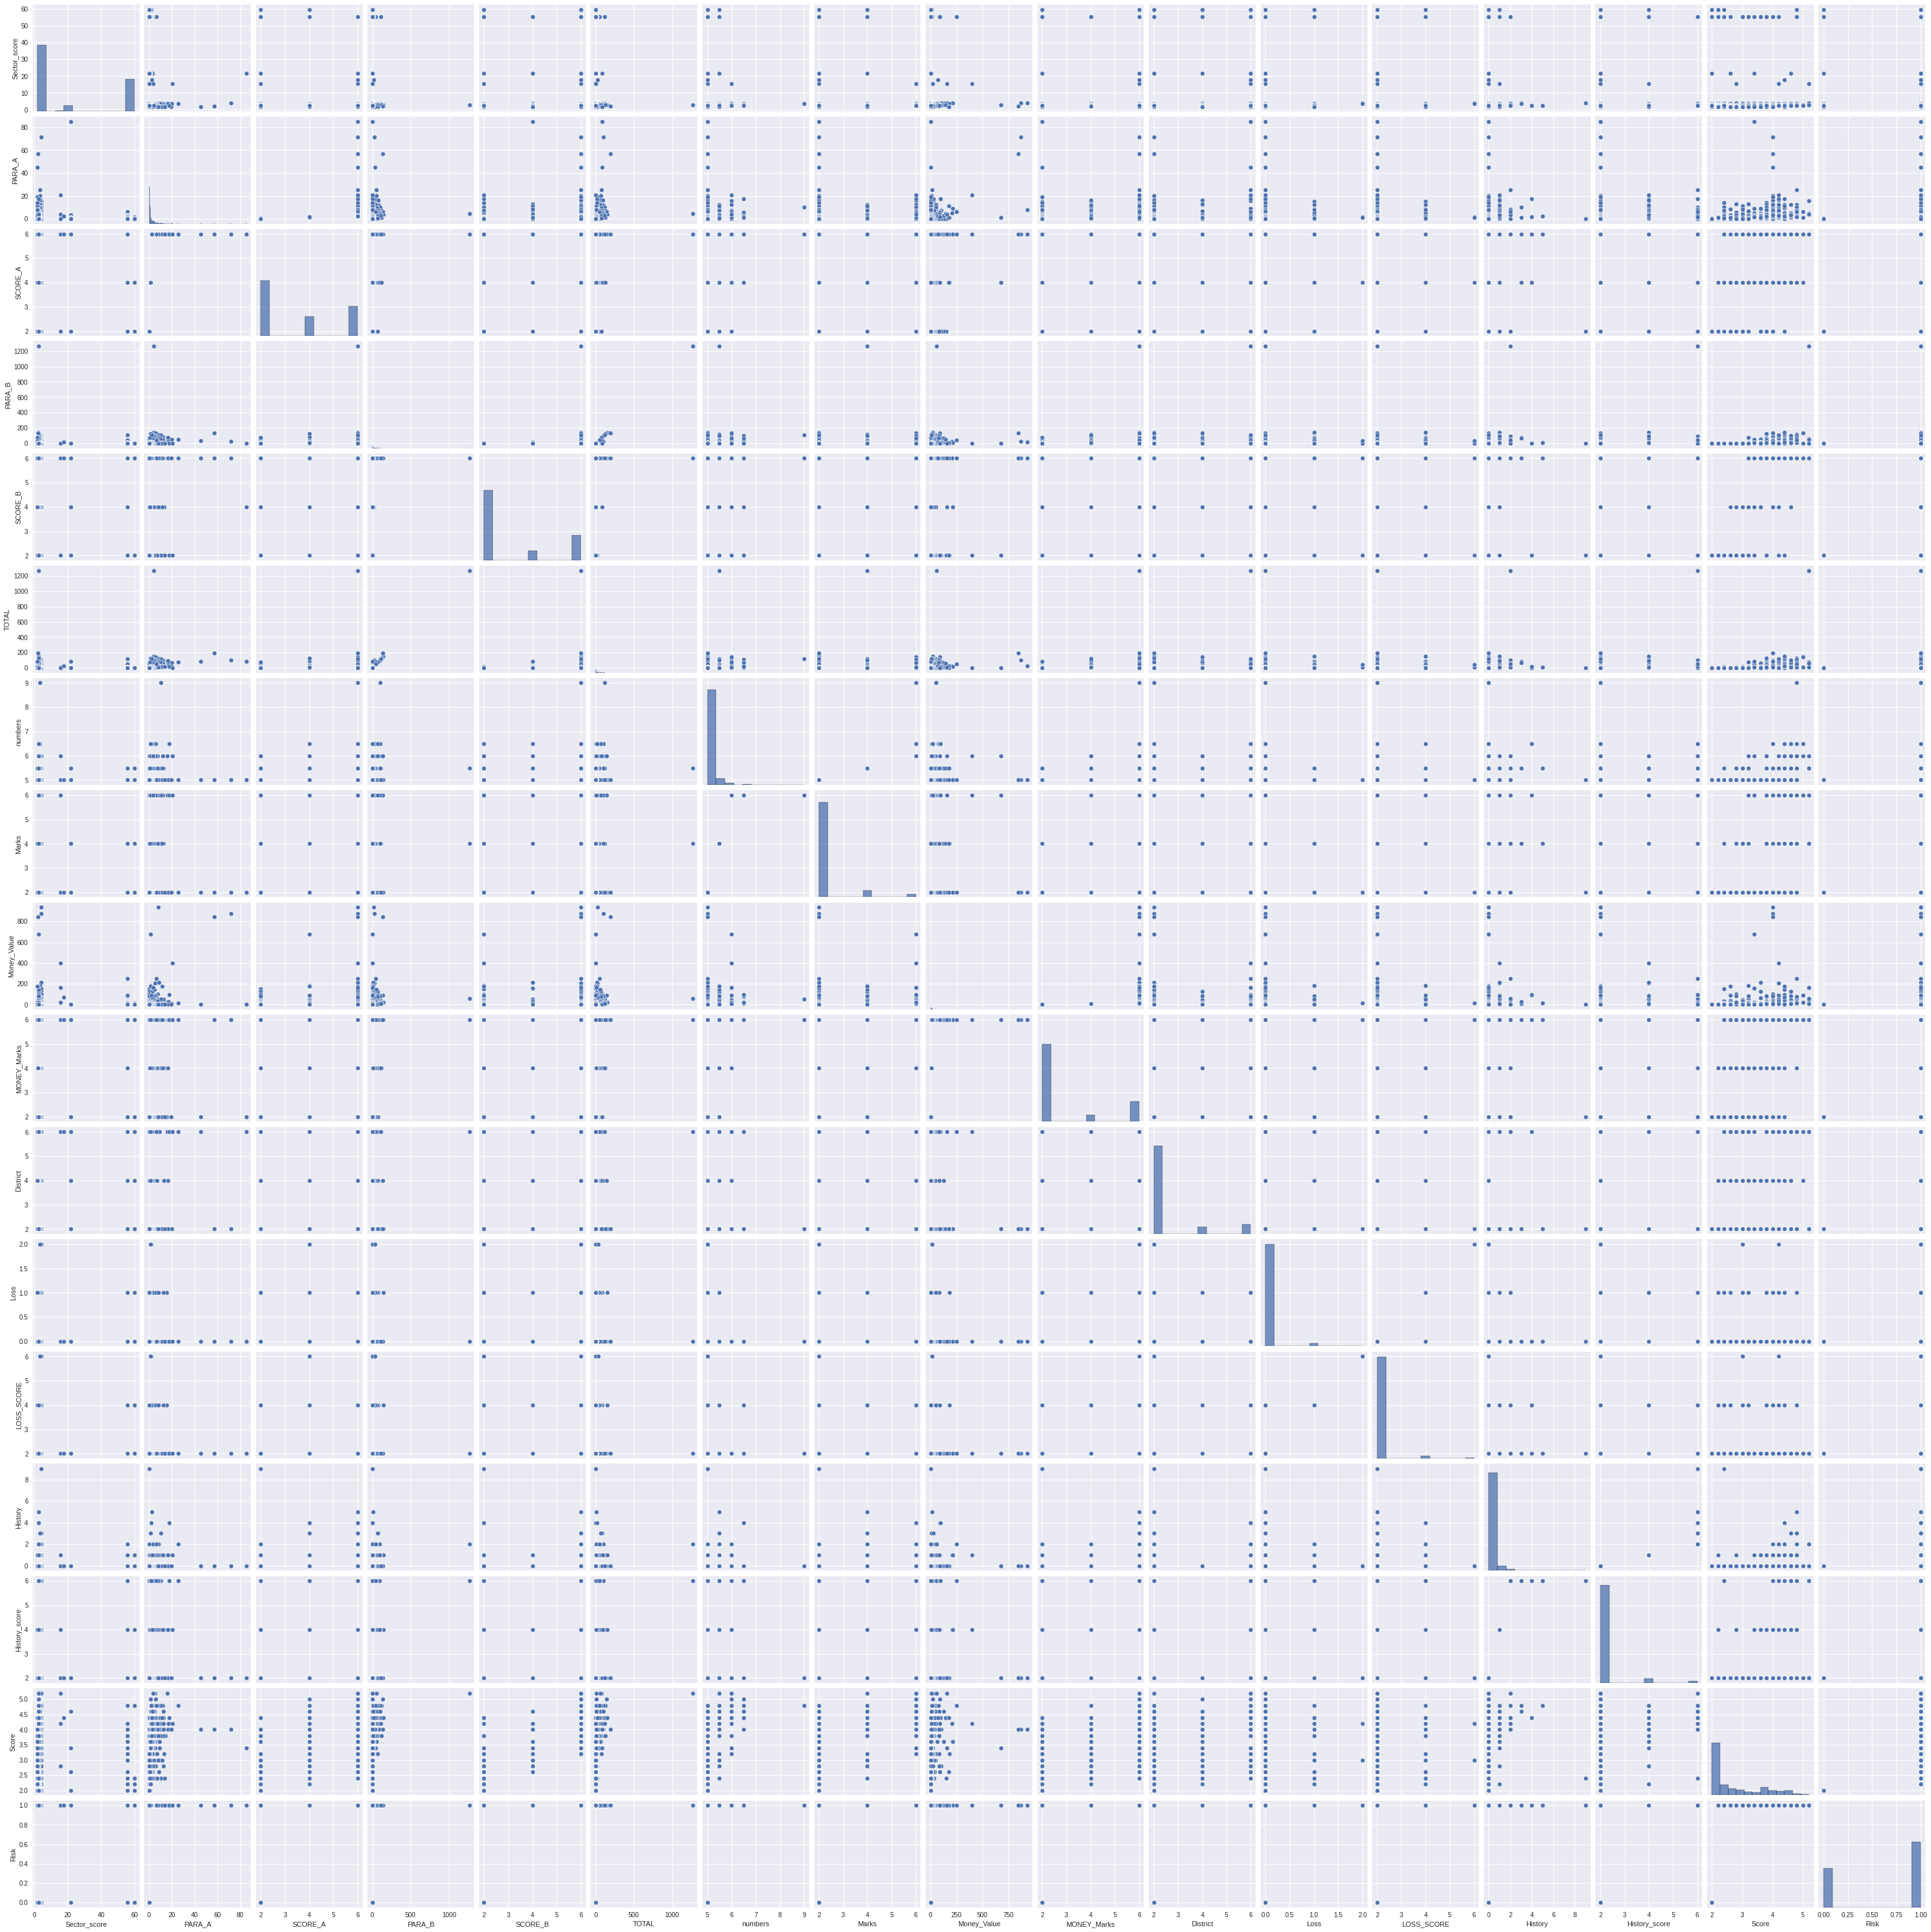

In [ ]:
sns.pairplot(df)

In [ ]:
#separazione 
X_=


In [ ]:
#Data Standardization